In [2]:
import numpy as np
import pandas as pd
import ast

In [33]:
jokes = pd.read_csv('combined_dataframe_only_with_questionmarks_only_good_explanations_manuallyfiltered_EMBEDDINGS_minilm_openai_COMPLETE.csv')


In [34]:
jokes

,setup,punchline,central_expression,explanation,sentence1,sentence2,emb_minilm_setup,emb_minilm_punchline,emb_minilm_central_expression,emb_minilm_explanation,emb_minilm_sentence1,emb_minilm_sentence2,emb_openai_setup,emb_openai_punchline,emb_openai_central_expression,emb_openai_explanation,emb_openai_sentence1,emb_openai_sentence2
0,What did the bird say after its cage fell apart?,cheap cheap!,cheap,Cheap can mean low in cost or of poor quality.,"The shirt was very cheap, so I decided to buy...",The cheap cheap of the birds was relaxing.,"[0.015073234215378761, 0.12362648546695709, -0...","[-0.015935979783535004, 0.059517741203308105, ...","[-0.03870081156492233, 0.06977570801973343, 0....","[0.02776321955025196, 0.055871497839689255, 0....","[-0.018473975360393524, 0.12070734053850174, 0...","[0.07662387192249298, 0.10422947257757187, 0.0...","[0.02854520082473755, 0.016865214332938194, 0....","[-0.043531935662031174, 0.010026056319475174, ...","[-0.007821429520845413, -0.019370829686522484,...","[0.0049156807363033295, -0.007109236903488636,...","[-0.043531935662031174, 0.010026056319475174, ...","[0.009920158423483372, -0.018715130165219307, ..."
1,Why did the radiologist break up with the gold...,because he saw right through her.,saw,Saw can mean to visualize with the eyes or to...,I saw a beautiful sunset at the beach.,I used a saw to cut the wood for the project.,"[0.007488126866519451, 0.030674085021018982, -...","[0.06745095551013947, 0.01017136499285698, 0.0...","[-0.12122045457363129, -0.02459784410893917, -...","[-0.055776748806238174, -0.05288219079375267, ...","[0.05075623095035553, 0.055086541920900345, 0....","[-0.00222043227404356, 0.05221560597419739, 0....","[-0.025358721613883972, -0.012494157068431377,...","[-0.002336961217224598, -0.01616068184375763, ...","[-0.000600526574999094, -0.023334747180342674,...","[0.03319184482097626, 0.024518469348549843, -0...","[-0.002336961217224598, -0.01616068184375763, ...","[-0.0023913229815661907, 0.008885013870894909,..."
2,Why was 6 afraid of 7?,because 7 was arrested for manslaughter.,seven,Seven can refer to the number or can suggest ...,I have seven apples in the basket.,The seven wonders of the world are a marvel t...,"[0.02685719169676304, 0.029428044334053993, 0....","[-0.010619604960083961, 0.03787219896912575, 0...","[-0.020596999675035477, 0.03459898382425308, -...","[0.022140510380268097, 0.004772734362632036, 0...","[0.06108887866139412, 0.02654448337852955, 0.0...","[0.010117757134139538, 0.003312867833301425, 0...","[-0.032564472407102585, -0.02926553785800934, ...","[-0.01601955108344555, 0.03183838725090027, -0...","[-0.02164021134376526, -0.019520355388522148, ...","[-0.003673259634524584, -0.015242430381476879,...","[-0.01601955108344555, 0.03183838725090027, -0...","[-0.03528172895312309, -0.0237813089042902, -0..."
3,What type of bees provide milk?,boobees (boobies),boob,Boob can refer to a breast or can mean a fool...,I saw a movie that made fun of the act of bei...,The design on the shirt was of a big boob in ...,"[-0.00726522458717227, -0.03685988485813141, 0...","[0.0488065667450428, -0.03062276542186737, -0....","[0.043378766626119614, 0.009756536222994328, -...","[0.051911305636167526, -0.015422701835632324, ...","[0.014864183031022549, -0.04198140278458595, -...","[0.02096489444375038, 0.11874034255743027, -0....","[0.0431600883603096, 0.0144062964245677, -0.00...","[0.04819903150200844, 0.021522026509046555, 0....","[0.03646025434136391, 0.004692801274359226, -0...","[0.06878507882356644, -0.0014293373096734285, ...","[0.04820004478096962, 0.02143656089901924, 0.0...","[0.07858400046825409, 0.007153424900025129, -0..."
4,Why did the melon plan a big elaborate wedding?,because he cantaloupe.,cantaloupe,A type of melon,I bought a cantaloupe from the grocery store ...,The cantaloupe was so large that it could not...,"[-0.02460584230720997, 0.09776933491230011, 0....","[0.0727701485157013, 0.00920684915035963, 0.01...","[-0.030697468668222427,

In [35]:
jokes = jokes.drop(jokes.iloc[[310, 311, 312]].index)

In [36]:
jokes.setup

0       What did the bird say after its cage fell apart?
1      Why did the radiologist break up with the gold...
2                                 Why was 6 afraid of 7?
3                        What type of bees provide milk?
4        Why did the melon plan a big elaborate wedding?
                             ...                        
474    What is a pedophile music teachers favorite ch...
475    What do you call a dog with no legs and metal ...
476    What did the neckbeard say while giving the eu...
477                    How do you mend a jack-o-lantern?
478                  What do elephants use as a tampons?
Name: setup, Length: 476, dtype: object

In [37]:
rJokes_complete = pd.read_csv('only_true_jokes_CSVs/selection/rJokes_complete.csv')

In [38]:
rJokes_complete

,joke_complete,body,punchline_complete,score,date
0,A Day in Court,NaN,A Day in Court,5.0,1.201282e+09
1,Photograph of Software project Team,NaN,Photograph of Software project Team,0.0,1.202643e+09
2,what we guys really like,NaN,what we guys really like,3.0,1.202651e+09
3,The Nietzsche Family Circus random generator,NaN,The Nietzsche Family Circus random generator,3.0,1.204249e+09
4,funny pic: His & Hers SUV,NaN,funny pic: His & Hers SUV,0.0,1.206129e+09
...,...,...,...,...,...
573403,A German joke A German is driving his car in B...,A German is driving his car in Britain. A Brit...,A German joke,16.0,1.577835e+09
573404,My wife has asked me to help her with her diet...,So I've hidden her teeth!,My wife has asked me to help her with her diet...,4.0,1.577835e+09
573405,Me arguing with my dad Me: I hate you motherfu...,Me: I hate you motherfucker\nMy dad: That’s th...,Me arguing with my dad,2.0,1.577836e+09
573406,"Early I know it's early, but a very happy new ...","I know it's early, but a very happy new year f...",Early,21.0,1.577836e+09


### Add score from the original complete dataset

In [39]:
import pandas as pd
import numpy as np

# Ensure the 'score' column exists and is initialized with NaN
jokes['score'] = np.nan
i=0

# Iterate through each row in jokes
for idx, row in jokes.iterrows():
    print(i)
    setup = row['setup']
    
    # Find rows in rJokes_complete where 'joke_complete' contains the 'setup'
    match = rJokes_complete[rJokes_complete['joke_complete'].str.contains(setup, na=False)]

    if not match.empty:
        # Assign the first matched score to the jokes DataFrame
        jokes.at[idx, 'score'] = match.iloc[0]['score']

    i=i+1

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [40]:
jokes

,setup,punchline,central_expression,explanation,sentence1,sentence2,emb_minilm_setup,emb_minilm_punchline,emb_minilm_central_expression,emb_minilm_explanation,emb_minilm_sentence1,emb_minilm_sentence2,emb_openai_setup,emb_openai_punchline,emb_openai_central_expression,emb_openai_explanation,emb_openai_sentence1,emb_openai_sentence2,score
0,What did the bird say after its cage fell apart?,cheap cheap!,cheap,Cheap can mean low in cost or of poor quality.,"The shirt was very cheap, so I decided to buy...",The cheap cheap of the birds was relaxing.,"[0.015073234215378761, 0.12362648546695709, -0...","[-0.015935979783535004, 0.059517741203308105, ...","[-0.03870081156492233, 0.06977570801973343, 0....","[0.02776321955025196, 0.055871497839689255, 0....","[-0.018473975360393524, 0.12070734053850174, 0...","[0.07662387192249298, 0.10422947257757187, 0.0...","[0.02854520082473755, 0.016865214332938194, 0....","[-0.043531935662031174, 0.010026056319475174, ...","[-0.007821429520845413, -0.019370829686522484,...","[0.0049156807363033295, -0.007109236903488636,...","[-0.043531935662031174, 0.010026056319475174, ...","[0.009920158423483372, -0.018715130165219307, ...",NaN
1,Why did the radiologist break up with the gold...,because he saw right through her.,saw,Saw can mean to visualize with the eyes or to...,I saw a beautiful sunset at the beach.,I used a saw to cut the wood for the project.,"[0.007488126866519451, 0.030674085021018982, -...","[0.06745095551013947, 0.01017136499285698, 0.0...","[-0.12122045457363129, -0.02459784410893917, -...","[-0.055776748806238174, -0.05288219079375267, ...","[0.05075623095035553, 0.055086541920900345, 0....","[-0.00222043227404356, 0.05221560597419739, 0....","[-0.025358721613883972, -0.012494157068431377,...","[-0.002336961217224598, -0.01616068184375763, ...","[-0.000600526574999094, -0.023334747180342674,...","[0.03319184482097626, 0.024518469348549843, -0...","[-0.002336961217224598, -0.01616068184375763, ...","[-0.0023913229815661907, 0.008885013870894909,...",3.0
2,Why was 6 afraid of 7?,because 7 was arrested for manslaughter.,seven,Seven can refer to the number or can suggest ...,I have seven apples in the basket.,The seven wonders of the world are a marvel t...,"[0.02685719169676304, 0.029428044334053993, 0....","[-0.010619604960083961, 0.03787219896912575, 0...","[-0.020596999675035477, 0.03459898382425308, -...","[0.022140510380268097, 0.004772734362632036, 0...","[0.06108887866139412, 0.02654448337852955, 0.0...","[0.010117757134139538, 0.003312867833301425, 0...","[-0.032564472407102585, -0.02926553785800934, ...","[-0.01601955108344555, 0.03183838725090027, -0...","[-0.02164021134376526, -0.019520355388522148, ...","[-0.003673259634524584, -0.015242430381476879,...","[-0.01601955108344555, 0.03183838725090027, -0...","[-0.03528172895312309, -0.0237813089042902, -0...",52.0
3,What type of bees provide milk?,boobees (boobies),boob,Boob can refer to a breast or can mean a fool...,I saw a movie that made fun of the act of bei...,The design on the shirt was of a big boob in ...,"[-0.00726522458717227, -0.03685988485813141, 0...","[0.0488065667450428, -0.03062276542186737, -0....","[0.043378766626119614, 0.009756536222994328, -...","[0.051911305636167526, -0.015422701835632324, ...","[0.014864183031022549, -0.04198140278458595, -...","[0.02096489444375038, 0.11874034255743027, -0....","[0.0431600883603096, 0.0144062964245677, -0.00...","[0.04819903150200844, 0.021522026509046555, 0....","[0.03646025434136391, 0.004692801274359226, -0...","[0.06878507882356644, -0.0014293373096734285, ...","[0.04820004478096962, 0.02143656089901924, 0.0...","[0.07858400046825409, 0.007153424900025129, -0...",NaN
4,Why did the melon plan a big elaborate wedding?,because he cantaloupe.,cantaloupe,A type of melon,I bought a cantaloupe from the grocery store ...,The cantaloupe was so large that it could not...,"[-0.02460584230720997, 0.09776933491230011, 0....","[0.0727701485157013, 0.00920684915035963, 0.01...","

In [41]:
jokes.score

0       NaN
1       3.0
2      52.0
3       NaN
4       0.0
       ... 
474     NaN
475    73.0
476     0.0
477     NaN
478     NaN
Name: score, Length: 476, dtype: float64

### Check number of NaNs in jokes: they are the jokes for which we do not have score. Let's drop them

In [44]:
jokes.score.isna().sum()


np.int64(213)

In [47]:
jokes = jokes.dropna(subset=['score']).reset_index(drop=True)

In [50]:
jokes

,setup,punchline,central_expression,explanation,sentence1,sentence2,emb_minilm_setup,emb_minilm_punchline,emb_minilm_central_expression,emb_minilm_explanation,emb_minilm_sentence1,emb_minilm_sentence2,emb_openai_setup,emb_openai_punchline,emb_openai_central_expression,emb_openai_explanation,emb_openai_sentence1,emb_openai_sentence2,score
0,Why did the radiologist break up with the gold...,because he saw right through her.,saw,Saw can mean to visualize with the eyes or to...,I saw a beautiful sunset at the beach.,I used a saw to cut the wood for the project.,"[0.007488126866519451, 0.030674085021018982, -...","[0.06745095551013947, 0.01017136499285698, 0.0...","[-0.12122045457363129, -0.02459784410893917, -...","[-0.055776748806238174, -0.05288219079375267, ...","[0.05075623095035553, 0.055086541920900345, 0....","[-0.00222043227404356, 0.05221560597419739, 0....","[-0.025358721613883972, -0.012494157068431377,...","[-0.002336961217224598, -0.01616068184375763, ...","[-0.000600526574999094, -0.023334747180342674,...","[0.03319184482097626, 0.024518469348549843, -0...","[-0.002336961217224598, -0.01616068184375763, ...","[-0.0023913229815661907, 0.008885013870894909,...",3.0
1,Why was 6 afraid of 7?,because 7 was arrested for manslaughter.,seven,Seven can refer to the number or can suggest ...,I have seven apples in the basket.,The seven wonders of the world are a marvel t...,"[0.02685719169676304, 0.029428044334053993, 0....","[-0.010619604960083961, 0.03787219896912575, 0...","[-0.020596999675035477, 0.03459898382425308, -...","[0.022140510380268097, 0.004772734362632036, 0...","[0.06108887866139412, 0.02654448337852955, 0.0...","[0.010117757134139538, 0.003312867833301425, 0...","[-0.032564472407102585, -0.02926553785800934, ...","[-0.01601955108344555, 0.03183838725090027, -0...","[-0.02164021134376526, -0.019520355388522148, ...","[-0.003673259634524584, -0.015242430381476879,...","[-0.01601955108344555, 0.03183838725090027, -0...","[-0.03528172895312309, -0.0237813089042902, -0...",52.0
2,Why did the melon plan a big elaborate wedding?,because he cantaloupe.,cantaloupe,A type of melon,I bought a cantaloupe from the grocery store ...,The cantaloupe was so large that it could not...,"[-0.02460584230720997, 0.09776933491230011, 0....","[0.0727701485157013, 0.00920684915035963, 0.01...","[-0.030697468668222427, 0.0374496765434742, -0...","[-0.03980013728141785, 0.004972108174115419, 0...","[-0.019579900428652763, 0.02343406341969967, -...","[-0.037739649415016174, 0.05919461324810982, -...","[0.02010415680706501, 0.04667285084724426, -0....","[0.022400790825486183, -0.006642993073910475, ...","[0.032135266810655594, -0.01836719550192356, -...","[-0.038097042590379715, 0.034105442464351654, ...","[0.022400790825486183, -0.006642993073910475, ...","[0.032091304659843445, -0.011365670710802078, ...",0.0
3,How can you tell if someone got their dog from...,dont worry theyll let you know.,let,The term let means to allow or permit.,Please let me know if you have any questions ...,I hope they will let us know if the event is ...,"[-0.00539117306470871, 0.05857688933610916, 0....","[0.0022354505490511656, -0.04810196906328201, ...","[-0.06675653904676437, 0.04044463112950325, -0...","[0.04194096103310585, 0.04042356088757515, 0.0...","[-0.09673307836055756, 0.06690064072608948, 0....","[-0.020680885761976242, -0.018466545268893242,...","[-0.0033821361139416695, -0.043349530547857285...","[0.034634996205568314, -0.004950615577399731, ...","[-0.01101684384047985, -0.01995272748172283, -...","[0.043104387819767, -0.0009010729263536632, -0...","[0.034634996205568314, -0.004950615577399731, ...","[-0.004991018213331699, 0.012647897936403751, ...",0.0
4,What is a mummies favorite genre of music?,wrap,wrap,The word wrap refers to a type of music genre...,The chef prepared a delicious wrap filled wit...,The film was a wrap for the director after an...,"[0.019643135368824005, -0.07043468952178955, -...","[-0.07856648415327072, 0.096978664398193

In [49]:
jokes.to_csv("combined_dataframe_only_with_questionmarks_only_good_explanations_manuallyfiltered_EMBEDDINGS_minilm_openai_COMPLETE_with_score.csv", encoding='utf-8', index=False)


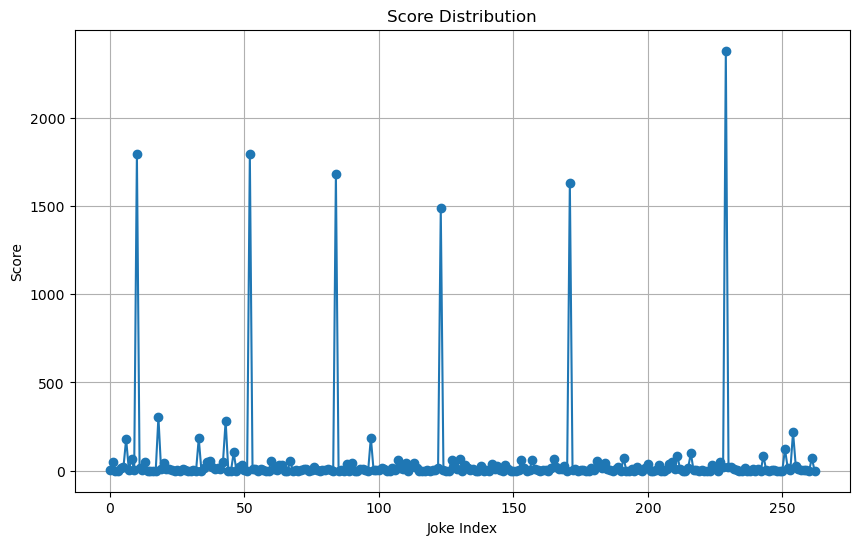

In [52]:
import matplotlib.pyplot as plt

# Plot the score values
plt.figure(figsize=(10, 6))
plt.plot(jokes['score'], marker='o', linestyle='-')
plt.title('Score Distribution')
plt.xlabel('Joke Index')
plt.ylabel('Score')
#plt.ylim(0, 100)  # Set Y-axis range from 0 to 10
#plt.yscale('log')
plt.grid(True)
plt.show()
